### Circuit 1

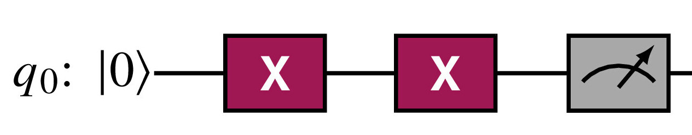

### Circuit 2

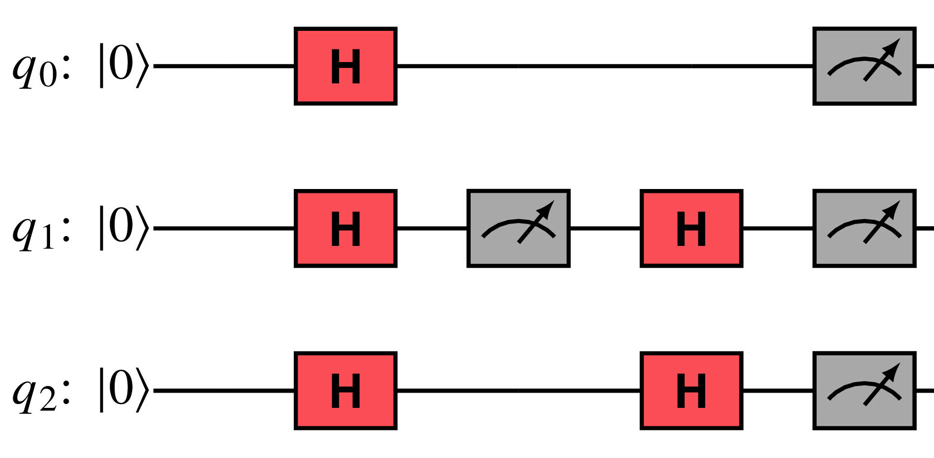

### Circuit 3

In this circuit, initialize the top qubit to |0⟩ and the bottom to |1⟩. Add measurements at the end.

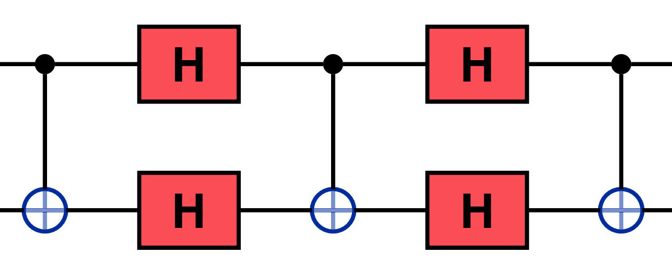

### Circuit 4

In this circuit, you do not write code for **U**<sub>*f*</sub> and **U**<sub>*&phi;*</sub> nor the yellow boxes, just the gates and measurements.

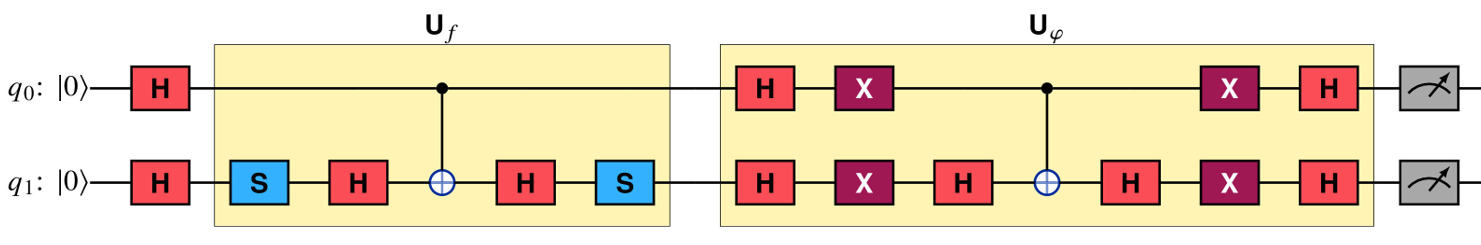

### Circuit 5

In this circuit, initialize the qubits to |0⟩ and add measurements at the end.

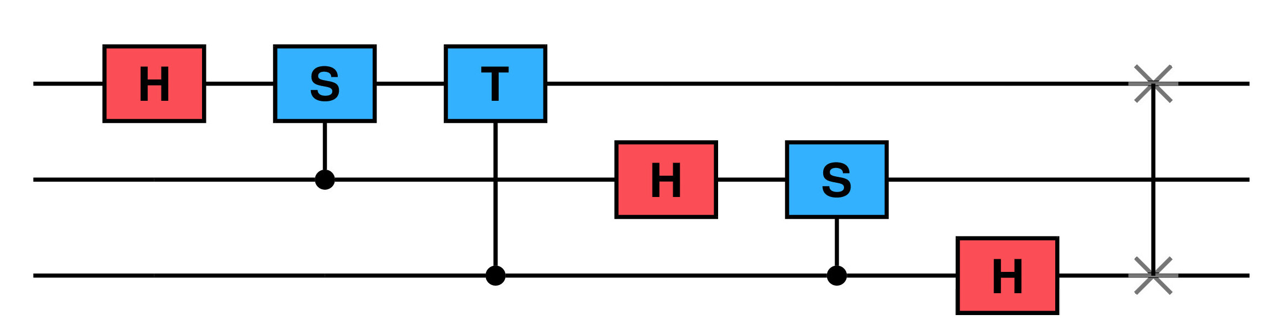

---
## Cirq

#### Documentation

* https://quantumai.google/cirq/start/intro
* https://quantumai.google/cirq/start/basics

#### Import the necessary libraries

Reset to keep Qiskit and Cirq namespaces separate

In [39]:
%reset -f

In [40]:
#%pip install cirq matplotlib numpy --quiet

In [41]:
import cirq
import matplotlib.pyplot as plt
import numpy as np

Test the import.

In [42]:
import cirq_google
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

#### Define the simulator

In [43]:
simulator = cirq.Simulator()

### Circuit 1 in Cirq

Insert code starting on the following line

In [44]:
circuit1 = cirq.Circuit()
qubits1 = cirq.LineQubit.range(1)

circuit1.append(cirq.X(qubits1[0]))
circuit1.append(cirq.X(qubits1[0]))
circuit1.append(cirq.measure(qubits1[0]))

print("Circuit #1 in Cirq:\n")
print(circuit1)


Circuit #1 in Cirq:

0: ───X───X───M───


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

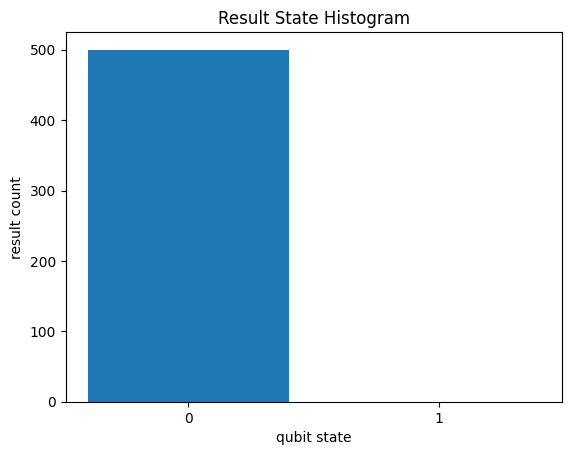

In [45]:
result1 = simulator.run(circuit1, repetitions=500)
cirq.plot_state_histogram(result1)

In [46]:
#showing only the non-zero outputs

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #1'}, xlabel='Measurement Outcome', ylabel='result count'>

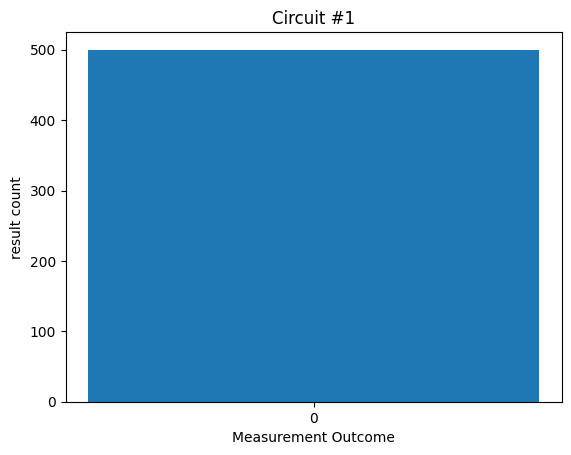

In [47]:
q = cirq.LineQubit.range(1)

circuit1v1 = cirq.Circuit([cirq.X(q[0]), [cirq.X(q[0])], cirq.measure(*q, key='measure_all')])

result1 = simulator.run(circuit1v1, repetitions=500)
nonzeros = result1.histogram(key = 'measure_all')
cirq.plot_state_histogram(nonzeros, xlabel='Measurement Outcome', title="Circuit #1")


### Circuit 2 in Cirq

Insert code starting on the following line

In [48]:
qubits2 = cirq.LineQubit.range(3)

circuit2 = cirq.Circuit(
    cirq.H(qubits2[0]),
    cirq.measure(qubits2[0], key='a'), 

    cirq.H(qubits2[1]),
    cirq.measure(qubits2[1], key='b'),
    cirq.H(qubits2[1]),
    cirq.measure(qubits2[1], key='c'), 

    cirq.H(qubits2[2]),
    cirq.H(qubits2[2]),
    cirq.measure(qubits2[2], key='d'),
)

print("Circuit #2 by Cirq:\n")
print(circuit2)

Circuit #2 by Cirq:

0: ───H───M('a')─────────────────────

1: ───H───M('b')───H────────M('c')───

2: ───H───H────────M('d')────────────


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

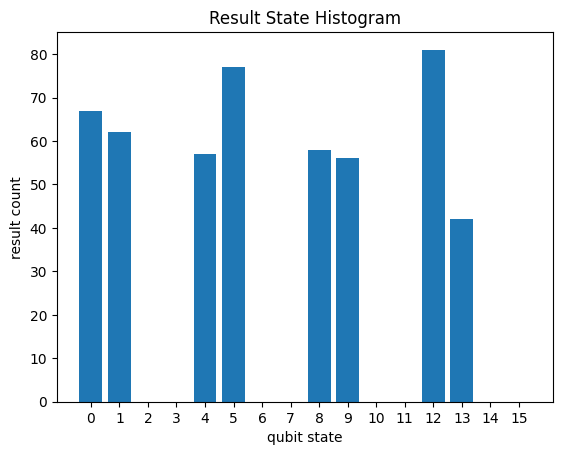

In [49]:
result2 = simulator.run(circuit2, repetitions=500)
cirq.plot_state_histogram(result2)

In [50]:
# Converting the X-axis values to binary, changing the title and x-label, and changing the size to better visualization

In [51]:
# A function for convering values of X-axis to binary format

In [52]:
def get_binary_list(num_digits):
    return[format (x,"b").zfill(num_digits) for x in range(2**num_digits)]

In [53]:
get_binary_list(3)

['000', '001', '010', '011', '100', '101', '110', '111']

<Axes: title={'center': 'Circuit #2'}, xlabel='Measurement Outcome', ylabel='result count'>

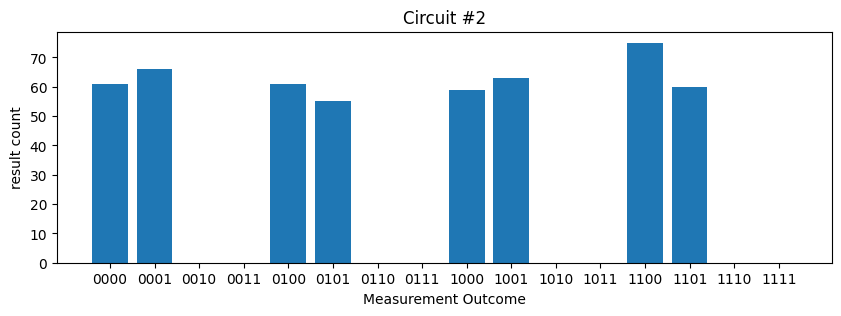

In [56]:
result2 = simulator.run(circuit2, repetitions=500)
mfig, myaxis = plt.subplots(figsize=(10, 3), nrows=1,ncols=1)
cirq.plot_state_histogram(result2, tick_label=get_binary_list(4), xlabel='Measurement Outcome', title="Circuit #2", ax=myaxis)

In [57]:
# The output is similar to Qiskit's output but there is a permutation in the outputs.

### Circuit 3 in Cirq

Insert code starting on the following line

In [58]:
circuit3 = cirq.Circuit()
qubits3 = cirq.LineQubit.range(2)

circuit3.append(cirq.X(qubits3[1]))
circuit3.append(cirq.CX(qubits3[0],qubits3[1]))
circuit3.append(cirq.H(qubits3[0]))
circuit3.append(cirq.H(qubits3[1]))
circuit3.append(cirq.CX(qubits3[0],qubits3[1]))
circuit3.append(cirq.H(qubits3[0]))
circuit3.append(cirq.H(qubits3[1]))
circuit3.append(cirq.CX(qubits3[0],qubits3[1]))


circuit3.append(cirq.measure(qubits) for qubits in qubits3)


print("Circuit #3 by Cirq:\n")
print(circuit3)

Circuit #3 by Cirq:

0: ───────@───H───@───H───@───M───
          │       │       │
1: ───X───X───H───X───H───X───M───


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

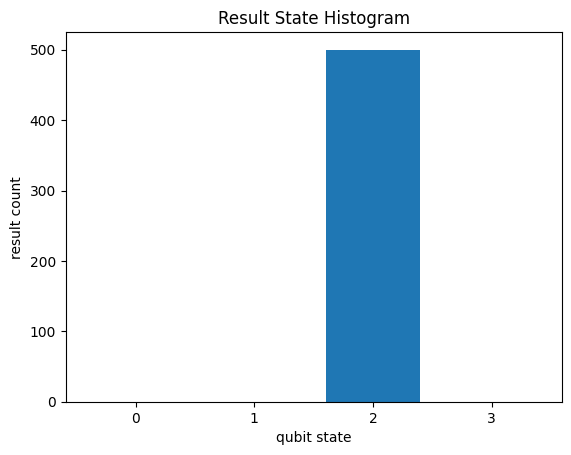

In [59]:
result3 = simulator.run(circuit3, repetitions=500)
cirq.plot_state_histogram(result3)

In [60]:
# Converting the X-axis values to binary and changing the title and x-label

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #3'}, xlabel='Measurement Outcome', ylabel='result count'>

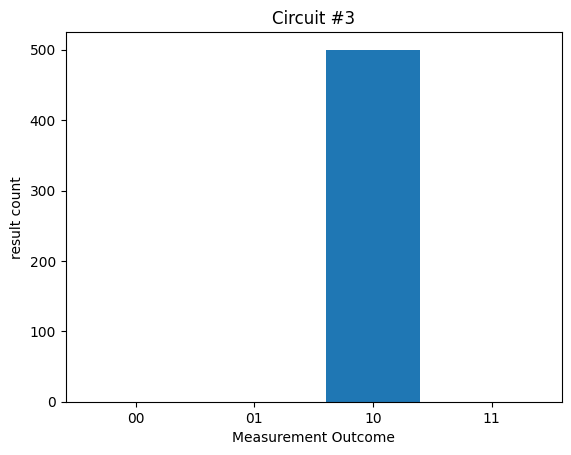

In [61]:
result3 = simulator.run(circuit3, repetitions=500)
cirq.plot_state_histogram(result3, tick_label=get_binary_list(2), xlabel='Measurement Outcome', title="Circuit #3")

### Circuit 4 in Cirq

Insert code starting on the following line

In [62]:
qubits4 = cirq.LineQubit.range(2)
circuit4 = cirq.Circuit(cirq.H.on_each(qubits4))

circuit4.append(cirq.S(qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.CX(qubits4[0],qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.S(qubits4[1]))
circuit4.append(cirq.H(qubits4[0]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.X(qubits4[0]))
circuit4.append(cirq.X(qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.CX(qubits4[0],qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.X(qubits4[0]))
circuit4.append(cirq.X(qubits4[1]))
circuit4.append(cirq.H(qubits4[0]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.measure(qubits) for qubits in qubits4)


print("Circuit #4 by Cirq:\n")
print(circuit4)


Circuit #4 by Cirq:

0: ───H───────────@───H───X───────────────@───X───H───M───────
                  │                       │
1: ───H───S───H───X───H───S───H───X───H───X───H───X───H───M───


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

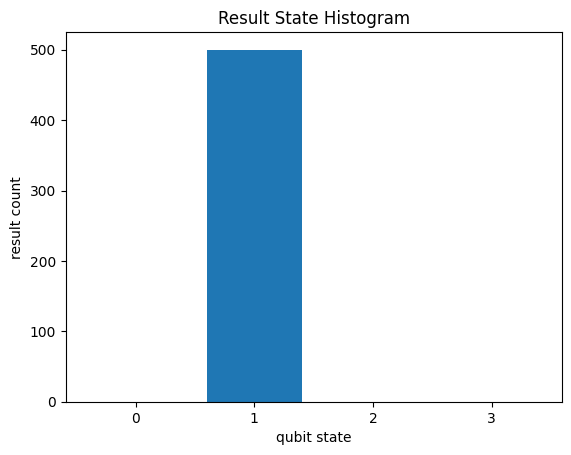

In [63]:
result4 = simulator.run(circuit4, repetitions=500)
cirq.plot_state_histogram(result4)

In [64]:
# Converting the X-axis values to binary and changing the title and x-label

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #4'}, xlabel='Measurement Outcome', ylabel='result count'>

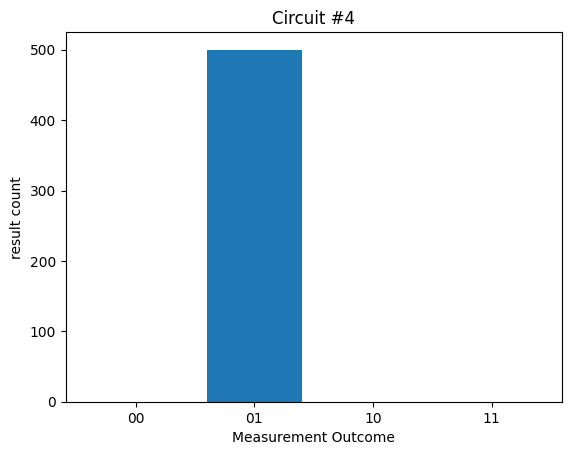

In [65]:
result4 = simulator.run(circuit4, repetitions=500)
cirq.plot_state_histogram(result4, tick_label=get_binary_list(2), xlabel='Measurement Outcome', title="Circuit #4")

### Circuit 5 in Cirq

Insert code starting on the following line

In [66]:
circuit5 = cirq.Circuit()
qubits5 = cirq.LineQubit.range(3)

circuit5.append(cirq.H(qubits5[0]))
circuit5.append(cirq.S(qubits5[0]).controlled_by(qubits5[1]))
circuit5.append(cirq.S(qubits5[0]).controlled_by(qubits5[2]))
circuit5.append(cirq.H(qubits5[1]))
circuit5.append(cirq.S(qubits5[1]).controlled_by(qubits5[2]))
circuit5.append(cirq.H(qubits5[2]))
circuit5.append(cirq.SWAP((qubits5[0]),(qubits5[2])))
circuit5.append(cirq.measure(qubits) for qubits in qubits5 )

print("Circuit #5 by Cirq:\n")
print(circuit5)

Circuit #5 by Cirq:

                  ┌──────┐
0: ───H───@────────@─────────────────────×───M───
          │        │                     │
1: ───────@^0.5────┼────H────@───────M───┼───────
                   │         │           │
2: ────────────────@^0.5─────@^0.5───H───×───M───
                  └──────┘


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

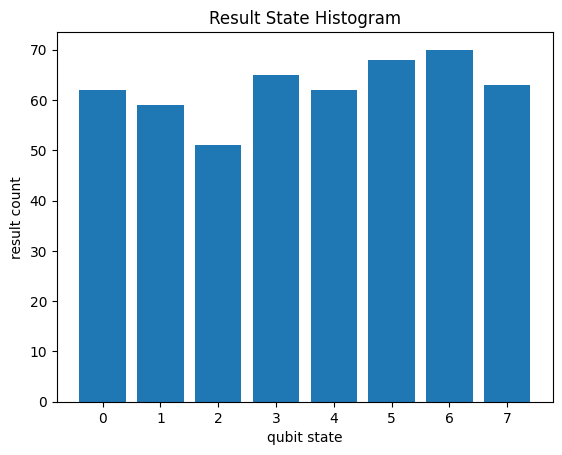

In [67]:
result5 = simulator.run(circuit5, repetitions=500)
cirq.plot_state_histogram(result5)

In [68]:
# Converting the X-axis values to binary and changing the title and x-label

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #5'}, xlabel='Measurement Outcome', ylabel='result count'>

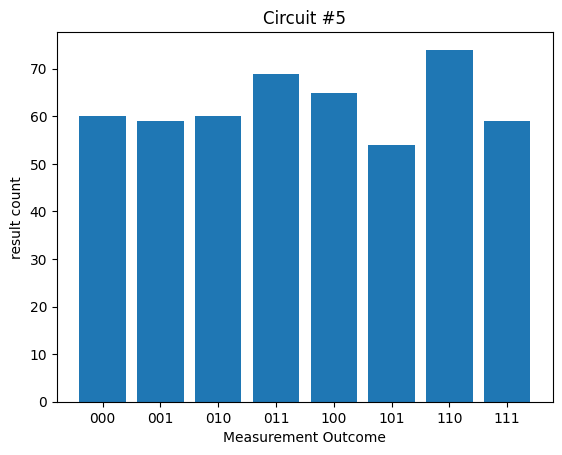

In [69]:
result5 = simulator.run(circuit5, repetitions=500)
cirq.plot_state_histogram(result5, tick_label=get_binary_list(3), xlabel='Measurement Outcome', title="Circuit #5")

In [70]:
# Rotation of x-axis values for 90 degrees

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


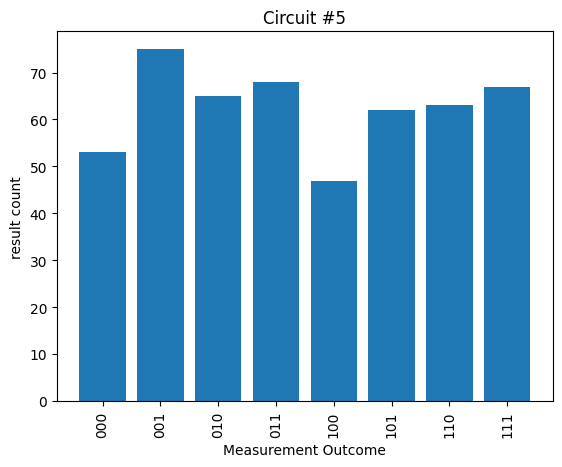

In [71]:
result5 = simulator.run(circuit5, repetitions=500)
cirq.plot_state_histogram(result5, tick_label=get_binary_list(3), xlabel='Measurement Outcome', title="Circuit #5").tick_params(axis='x',labelrotation=90)